## 教學館 Report ｜以科ㄧ為例
任務：產生一份報告，分析五週間的用電狀況。
目標：(1)好讀 (2)容易理解 ,(3)資料正確且有意義, (4)可重複

### 進度
    1. 框架(Done)
    2. IPython notebook 實踐(Wrorking on)
    3. 變成書面報告及電子檔
    4. 變成網頁
    
### 報告時間週期
    - def Weeks: from Monday to Sunday.
    - one period = 5 weeks
    - Starts from week 0, ends at week 19. Four period.
        - P1: 2.12 - 3.11 (Holiday: 2.28, 3.1)
        - P2: 3.12 - 4.15 (Holiday: 4.4, 4.5, 4.8 兒童節、校慶補假)
        - P3: 4.16 - 5.20 (No Holiday)
        - P4: 5.21 - 6.24 (Holiday: 6.7 端午節)

### 呈現資訊
    1. #ok [文字] 基本：館舍資訊、期間、資料描述（幾小時一筆、迴路等）  
    2. #ok [數字] [這一期] 電費是多少？跟上一期比較又是多少？
    3. #ok [欄位] 最高用電的天、時間
    4. #ok [圖表] 每週七天平均用電曲線 （比較差異）
    5. #ok [圖表] 24小時用電 - 從六點開始 - 五週平均線
    6. #ok [數字] 假日平日用電比 (%)
    7. #ok [表格] 每週用電比例 
    8. [圖表] （跟其他館舍的比較）
    9. [文字] 節電建議
    10. ...

### 放入資訊
    - 位置：館舍 Dic 去找
    - 期間：一個list，六個數字
    - 電費：一個float
---


In [277]:
# 呼叫 libary 
import pandas as pd
import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/ah-bau/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [278]:
# plot setting
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20, 8)

## 預設資料 

In [279]:
### Input data ###
Path = "../01data/106B_P1_P4/+teach_p2.csv"
Place = "SB1"
Period = 1 
Rate = 2.45
### Input data ###

## 抓資料

In [280]:
def make_df(PATH, Place, Rate):
    df = pd.read_csv(Path)
    # print(df.Building.unique())
    df = df[df.Building == Place] #選定地方
    df.Week.unique() #確認日期
    df.head()
    
# cost_rate：一度電大概多少錢
def generate_cost_columns(df, Rate):
    df['Cost'] = df.Usage * Rate
    print('Column "Cost" had been generated!')
    return df
df = generate_cost_columns(df,Rate)

,Unnamed: 0,DateTime,Area,Building,Loop,Type,Usage,Date,Weekday,DayName,Time,Week
7560,7560,2018/03/12 00:00,N,SB1,main,edu,39.50,2018-03-12,1,Monday,00:00,11
7561,7561,2018/03/12 01:00,N,SB1,main,edu,37.13,2018-03-12,1,Monday,01:00,11
7562,7562,2018/03/12 02:00,N,SB1,main,edu,35.00,2018-03-12,1,Monday,02:00,11
7563,7563,2018/03/12 03:00,N,SB1,main,edu,34.38,2018-03-12,1,Monday,03:00,11
7564,7564,2018/03/12 04:00,N,SB1,main,edu,33.25,2018-03-12,1,Monday,04:00,11


In [281]:
# cost_rate：一度電大概多少錢
def generate_cost_columns(df, Rate):
    df['Cost'] = df.Usage * Rate
    print('Column "Cost" had been generated!')
    return df
df = generate_cost_columns(df,Rate)

Column "Cost" had been generated!


## 函數們

In [282]:
def find_max(df,n):
    lis = ['Date','Time','Cost','DayName']
    for i in lis:
        print(df.sort_values('Usage')[-1*n:][lis][i].value_counts())
# find_max(df,10)

# def count_max(df,n):
# df.sort_values('Usage')[-1*10:].Date.value_counts()
find_max(df,15)

2018-04-13    5
2018-04-12    5
2018-04-11    2
2018-04-02    2
2018-03-29    1
Name: Date, dtype: int64
14:00    4
15:00    3
16:00    2
11:00    2
13:00    2
10:00    1
12:00    1
Name: Time, dtype: int64
303.5060    1
345.7685    1
342.7060    1
302.8935    1
337.1935    1
311.1500    1
309.6310    1
418.3375    1
348.2185    1
357.7000    1
300.4435    1
360.4685    1
334.7435    1
349.4435    1
412.8250    1
Name: Cost, dtype: int64
Thursday     6
Friday       5
Monday       2
Wednesday    2
Name: DayName, dtype: int64


In [283]:
def cal_cost(df):
    cost_dic = {}
    cost_dic["sum"] = [round(df.Cost.sum())]
    cost_dic["weekday"] = list(round(df.groupby('Weekday').sum().Cost))
    cost_dic["week"] = list(round(df.groupby('Week').sum().Cost))
    cost_dic["hour"] = list(round(df.groupby('Time').sum().Cost))
    return(cost_dic)

def reveal_cost(cost_dic):
    for key in cost_dic:
        print()
        for i in range(len(cost_dic[key])):
            print("{} {}: {}".format(key,i, cost_dic[key][i]))
        
# reveal_cost(cal_cost(df))

In [284]:
def plot_weekday(df):
    df.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True)
    plt.title('{}: Cost Sum, by Weekdays'.format(Place), fontsize = 20)


def plot_hour(df):
    df.groupby(['Time','Weekday']).Cost.sum().unstack().plot(legend = True)
    plt.title('{}: Cost Sum, by Hours'.format(Place), fontsize = 20)
# plot_weekday(df)
# plot_hour(df)

In [285]:
# df.groupby(['Time','Weekday']).sum()[]

In [286]:
def usage_pct(df):
    mean_Sat = df[df.Weekday == 6].Usage.mean()
    mean_3am = df[df.Time == '03:00'].Usage.mean()
    return mean_Sat, mean_3am
# usage_pct(df)

In [287]:
def week_usage_pct(df):
    total = df.groupby('Week').sum().Usage.sum()
    for i in df.Week.unique():
        week = df[df.Week == i].Usage.sum()
        pct = round(week/total, 3) * 100
        print("Week {}: {} %".format(i,pct))
# week_usage_pct(df)

In [288]:
# pd.DataFrame(df.groupby(['Time','Weekday']).Cost.sum())

In [289]:
def analysis(df):
    print(find_max(df,10))
    print(reveal_cost(cal_cost(df)))
    print(plot_weekday(df))
    print(plot_hour(df))
    print(usage_pct(df))
    print(week_usage_pct(df))

    

## 書面報告

2018-04-13    4
2018-04-11    2
2018-04-12    2
2018-04-02    2
Name: Date, dtype: int64
15:00    3
16:00    2
14:00    2
13:00    2
12:00    1
Name: Time, dtype: int64
418.3375    1
348.2185    1
357.7000    1
349.4435    1
342.7060    1
334.7435    1
345.7685    1
360.4685    1
337.1935    1
412.8250    1
Name: Cost, dtype: int64
Friday       4
Thursday     2
Monday       2
Wednesday    2
Name: DayName, dtype: int64
None

hour 0: 3771.0
hour 1: 3470.0
hour 2: 3302.0
hour 3: 3214.0
hour 4: 3078.0
hour 5: 3089.0
hour 6: 2998.0
hour 7: 3331.0
hour 8: 4459.0
hour 9: 5496.0
hour 10: 6272.0
hour 11: 6316.0
hour 12: 6155.0
hour 13: 6948.0
hour 14: 7251.0
hour 15: 7263.0
hour 16: 6816.0
hour 17: 5868.0
hour 18: 5257.0
hour 19: 5213.0
hour 20: 4815.0
hour 21: 4528.0
hour 22: 4415.0
hour 23: 4289.0

week 0: 22794.0
week 1: 23069.0
week 2: 24909.0
week 3: 19732.0
week 4: 27110.0

sum 0: 117615.0

weekday 0: 19655.0
weekday 1: 19396.0
weekday 2: 17943.0
weekday 3: 18658.0
weekday 4: 17571.0
week

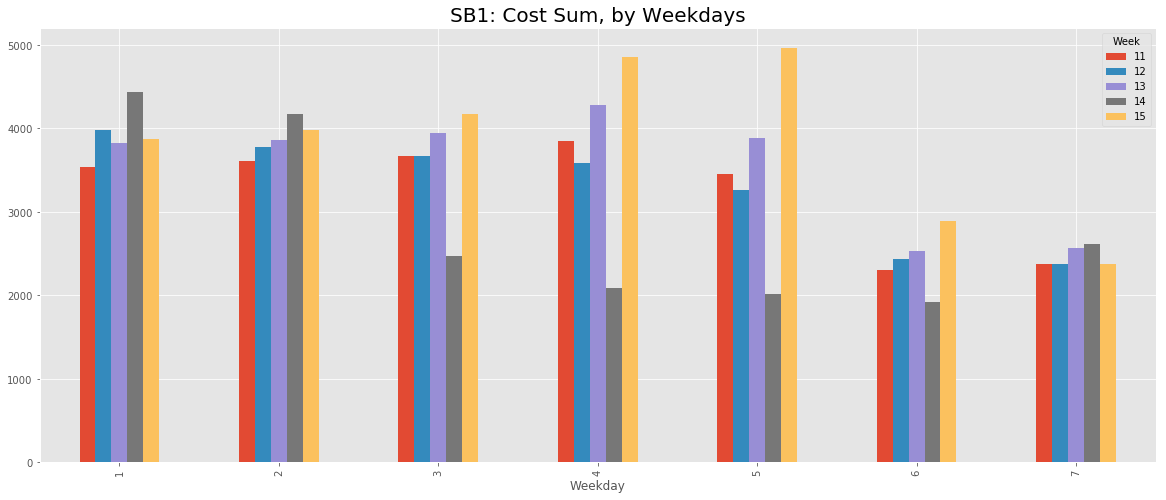

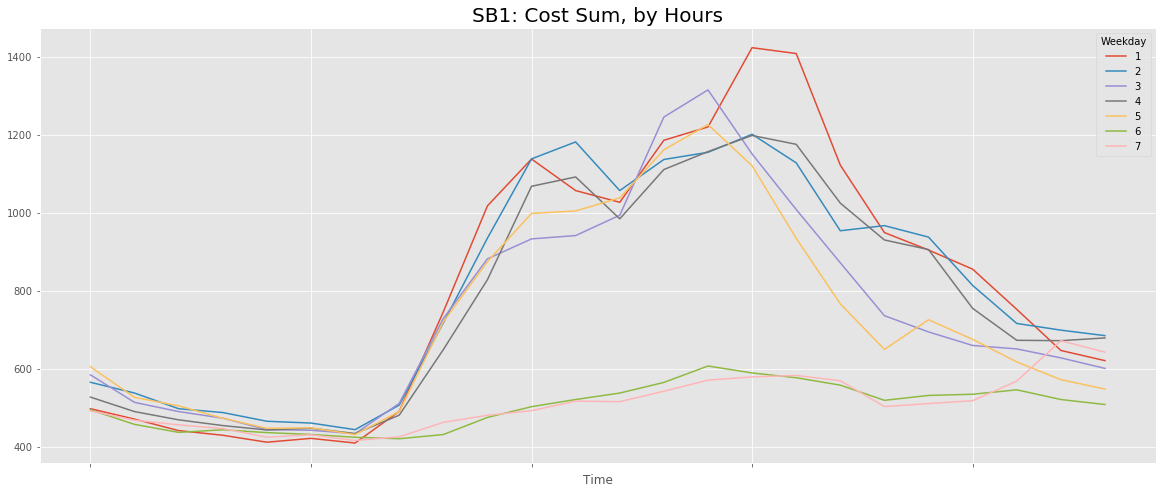

In [290]:
analysis(df)